In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

In [154]:
# derivative functions on r and theta
def polar(t, p, l, A, period):
    r, theta = p

    dr = l * r * (A - r)
    dtheta = 2 * np.pi / period
    return [dr, dtheta]

# derivative functions on x and y
def cartesian(t, p, l, A, period):
    x, y = p
    r = np.sqrt(x**2 + y**2)
    dx = l * x * (A - r) - 2 * np.pi * y / period
    dy = l * y * (A - r) + 2 * np.pi * x / period
    return [dx, dy]

In [156]:
tspan = [0, 96]
t = np.linspace(*tspan, 200)

r0 = [.1, 0]
A = 1
l = .1
period = 24

result = solve_ivp(polar, tspan, r0, args=(l, A, period), t_eval=t)
r, theta = result.y
x = r * np.cos(theta)
y = r * np.sin(theta)

Text(0, 0.5, 'y')

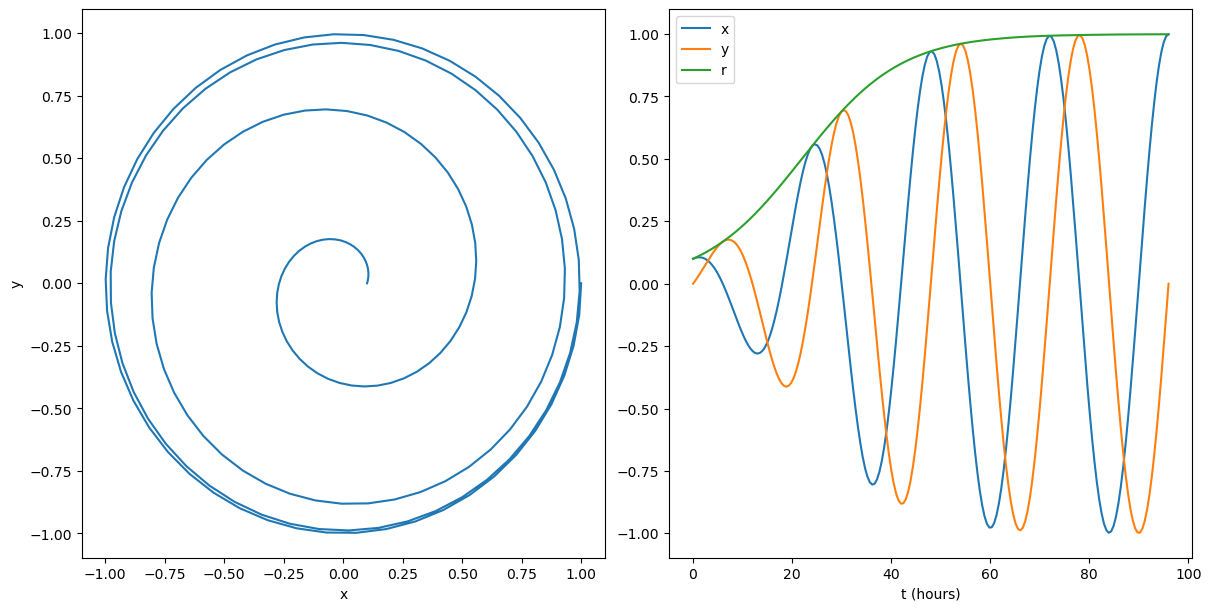

In [157]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(12, 6)

xygraph, tgraph = axs

xline, = tgraph.plot(t, x)
yline, = tgraph.plot(t, y)
rline, = tgraph.plot(t, r)

tgraph.set_xlabel('t (hours)')
tgraph.legend(['x', 'y', 'r'])

xygraph.plot(x, y)

xygraph.set_xlabel('x')
xygraph.set_ylabel('y')


In [176]:
# light intensity square wave-ish function
def intensity(t):
    step = np.round((t % 24) / 24)
    return step * .1

# derivative functions on x and y; include effect of light
def cartesian_lights(t, p, l, A, period):
    x, y = p
    r = np.sqrt(x**2 + y**2)
    
    # see equations 4 and 5 in the paper (section 4.1)
    dx = l * x * (A - r) - 2 * np.pi * y / period - intensity(t)
    dy = l * y * (A - r) + 2 * np.pi * x / period
    return [dx, dy]

In [185]:
tspan = [0, 200]
t = np.linspace(*tspan, 1000)

# parameters
A = 1
l = .5
period = 24

# initial x and y
r0 = [A, 0]

# solve the differential equations
result = solve_ivp(cartesian_lights, tspan, r0, args=(l, A, period), t_eval=t)

x, y = result.y
r = np.sqrt(x**2 + y**2)

Text(0, 0.5, 'y')

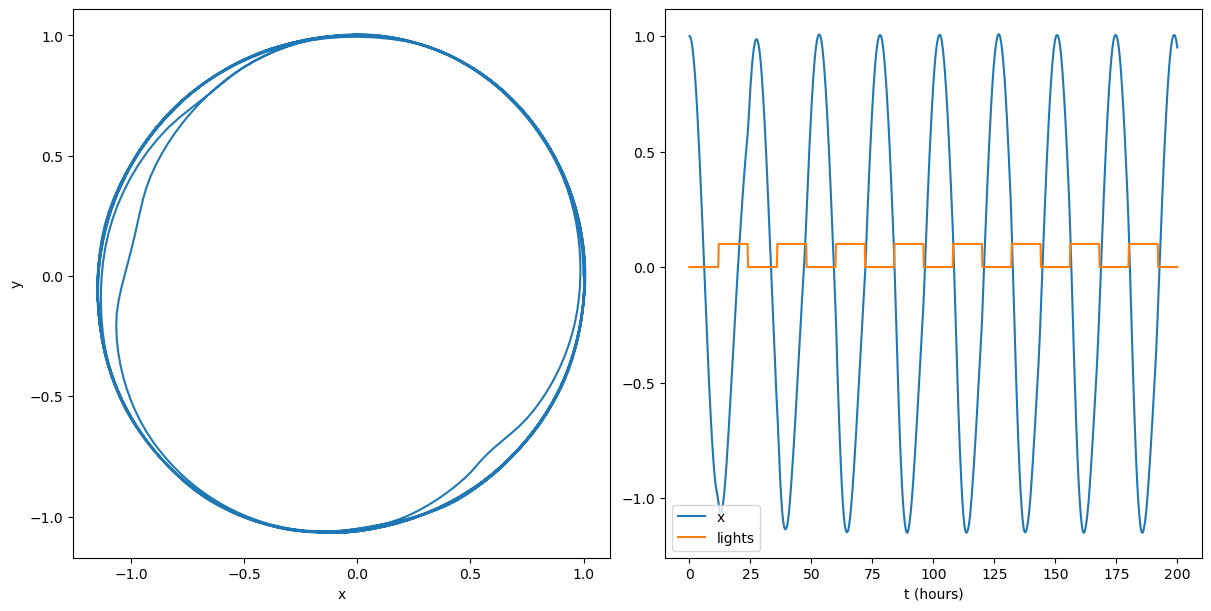

In [186]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.set_size_inches(12, 6)

# xygraph: plot x and y on respective axes
# tgraph: plot vars over time
xygraph, tgraph = axs

tgraph.plot(t, x)
tgraph.plot(t, intensity(t))

tgraph.set_xlabel('t (hours)')
tgraph.legend(['x', 'lights'])

xygraph.plot(x, y)

xygraph.set_xlabel('x')
xygraph.set_ylabel('y')
